In [1]:
import matplotlib.pyplot as plt
import numpy as np



In [194]:
Fs = 1
f = 1
min_in = 0
max_in = 1
noise_mu = 0
noise_sigma = 0.1
linspace_predict = 1000
linspace_input = 10
def make_sine_func(x):
    return np.sin(2 * np.pi * f * x / Fs)

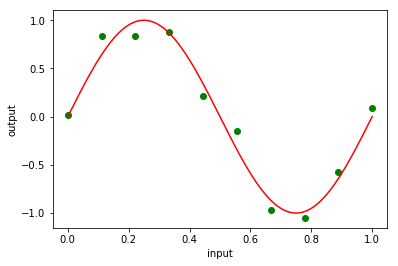

In [195]:

X = np.linspace(min_in, max_in, linspace_input)
noise = np.random.normal(noise_mu, noise_sigma, X.size)
T = make_sine_func(X) + noise

x0 = np.linspace(min_in, max_in, linspace_predict)
y0 = make_sine_func(x0)
plt.plot(X, T, 'go')
plt.plot(x0, y0, 'r')
plt.xlabel('input')
plt.ylabel('output')
plt.show()

In [198]:
def phi_j(x, j):
    return np.power(x, j)
def phi(x, M):
    return np.fromiter((np.power(x, i) for i in range(M)), np.float64)
def predict(M, W, x):
    phi_x = phi(x, M)
    return np.transpose(W).dot(phi_x)
def sum_of_square(X, T, W, M):
    predicted = np.zeros(X.size)
    for i in range(X.size):
        predicted[i] = predict(M, W, X[i])
        #print("x: {}, t:{}, predicted:{}".format(X[i], T[i], predicted[i]))
    error = np.subtract(predicted, T)
    #print("Error")
    #print(error)
    result = np.multiply(np.divide(1, 2),error.dot(error))
    #print("Sum square: {}".format(result))
    return result
def regularized_error(X, T, W, M, weight_decay):
    return sum_of_square(X, T, W, M) + weight_decay * 0.5 * W.dot(W)
def initialize_weight(M, sigma):
    W = np.random.normal(0, sigma, M)
    #W = np.zeros(M)
    return W
def gradient(X, T, W, M, weight_decay):
    regulizer = weight_decay * W
    regulizer[0] = 0
    #print(regulizer)
    regulizer[0] = 0.
    result = np.zeros(M)
    for i in range(X.size):
        result += (predict(M, W, X[i]) - T[i]) * phi(X[i], M)
    #print(result)
    result += regulizer
    return result
def update_weight(X, T, W, M, weight_decay, learning_rate):
    #print(W)
    #print(weight_decay)
    #print(learning_rate)
    #print(gradient(X, T, W, M, weight_decay))
    return W - np.divide(1, X.size) * learning_rate * gradient(X, T, W, M, weight_decay)

[ 0.07508199 -0.30450247  0.05167541  0.13288196  0.05198149 -0.18446003
 -0.04119105 -0.08096408 -0.0905199   0.0268171   0.01428835 -0.00635482
 -0.0589993   0.05322692 -0.08533219 -0.03893933  0.04517735  0.13540681
  0.05305991  0.06309336  0.17712372 -0.08297647  0.03730093 -0.00392426
  0.07105852 -0.01934616 -0.04886231 -0.02508933  0.11809388  0.15983549
 -0.07912521  0.1007229   0.00340594  0.04989395 -0.05074935  0.07466746
  0.0754681  -0.02986528  0.05678812 -0.18595021 -0.22081377 -0.16662964
  0.08365771 -0.03146461  0.02283028 -0.16146197 -0.00056026  0.04221934
  0.05560754  0.03225698 -0.02118084  0.0634349   0.10071924  0.08556677
 -0.10894982  0.13601106 -0.06064807 -0.02805646 -0.08398129 -0.08961943
 -0.01579853  0.07007361 -0.06342434  0.03889985  0.03680457  0.02350463
 -0.07793216  0.07476922 -0.08864918  0.11780608 -0.09935608 -0.13594712
 -0.02709829 -0.05282045 -0.09668512  0.12970471 -0.04613558  0.17314259
 -0.01693129 -0.18170906  0.05664638  0.10180718  0

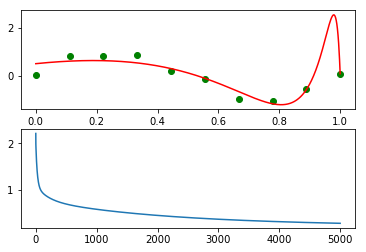

In [211]:
# hyperparameter
M = 100
LEARNING_RATE = 0.1
WEIGHT_DECAY = 0.0
WEIGHT_SIGMA = 0.1
STEP = 5000
steps = np.arange(STEP)
errors = []
W = initialize_weight(M, WEIGHT_SIGMA)
#print(W)
#print(T)
#print(X)
for _ in range(STEP):
    error = regularized_error(X, T, W, M, WEIGHT_DECAY)
    errors.append(error)
    #print(predict(M, W, X[0]))
    W = update_weight(X, T, W, M, WEIGHT_DECAY, LEARNING_RATE)
    #print(W)
print(W)
W_1 = [0.31, 7.99, -25.43, 17.37]
predicted = np.fromiter((predict(M, W, x0[i]) for i in range(x0.size)), np.float64)
plt.figure(1)
plt.subplot(211)
plt.plot(X, T, 'go')
plt.plot(x0, predicted, 'r')
plt.subplot(212)
plt.plot(steps, errors)
plt.show()
